# Machine Learning Model to identify possibility of repayment of Loan


In [ ]:
# Importing essential libraries for the model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Importing Dataset
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/credit-default.csv')

In [3]:
data.head(3)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident


# In order to build a machine learning model we need to first preprocess the data.

# 1.Missing Value Imputation

In [4]:
# To find whether missing values are present in the following columns
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [5]:
# We notice that although the isnull() function shows 0 , we can see certain possible null values hence we replace them to perform further required treatment.
data['checking_balance']=data['checking_balance'].replace("unknown",np.nan)
data['savings_balance']=data['savings_balance'].replace("unknown",np.nan)
data['property']=data['property'].replace("unknown/none",np.nan)


In [6]:
# After the replacement
data.isnull().sum()

checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_length         0
installment_rate          0
personal_status           0
other_debtors             0
residence_history         0
property                154
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
telephone                 0
foreign_worker            0
job                       0
dtype: int64

In [7]:
# Percentage of null values in each column
data.isnull().sum()/len(data)*100

checking_balance        39.4
months_loan_duration     0.0
credit_history           0.0
purpose                  0.0
amount                   0.0
savings_balance         18.3
employment_length        0.0
installment_rate         0.0
personal_status          0.0
other_debtors            0.0
residence_history        0.0
property                15.4
age                      0.0
installment_plan         0.0
housing                  0.0
existing_credits         0.0
default                  0.0
dependents               0.0
telephone                0.0
foreign_worker           0.0
job                      0.0
dtype: float64

In [8]:
# Imputing null values using mode
data['checking_balance']=data['checking_balance'].fillna(data['checking_balance'].mode()[0])
data['savings_balance']=data['savings_balance'].fillna(data['savings_balance'].mode()[0])
data['property']=data['property'].fillna(data['property'].mode()[0])

In [9]:

data.isnull().sum()/len(data)*100

checking_balance        0.0
months_loan_duration    0.0
credit_history          0.0
purpose                 0.0
amount                  0.0
savings_balance         0.0
employment_length       0.0
installment_rate        0.0
personal_status         0.0
other_debtors           0.0
residence_history       0.0
property                0.0
age                     0.0
installment_plan        0.0
housing                 0.0
existing_credits        0.0
default                 0.0
dependents              0.0
telephone               0.0
foreign_worker          0.0
job                     0.0
dtype: float64

In [ ]:
# Hence missing values are treated.

# Outlier Treatment

In [10]:
# Deriving numerical data alone to identify outliers using boxplot
num_data=data.select_dtypes(include=np.number)
num_data.columns

Index(['months_loan_duration', 'amount', 'installment_rate',
       'residence_history', 'age', 'existing_credits', 'default',
       'dependents'],
      dtype='object')

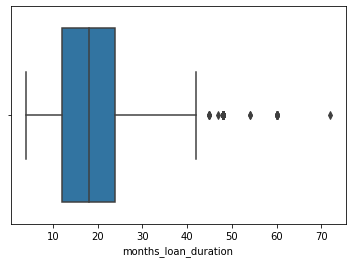

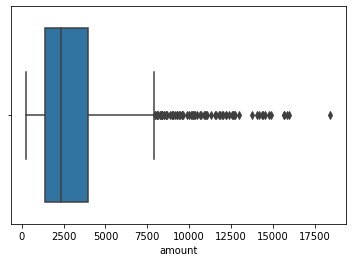

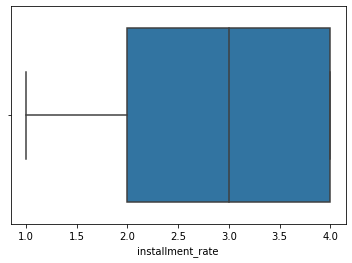

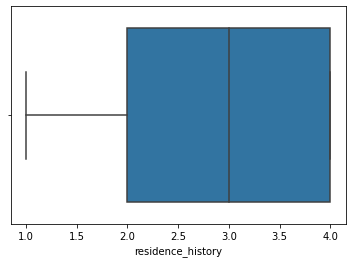

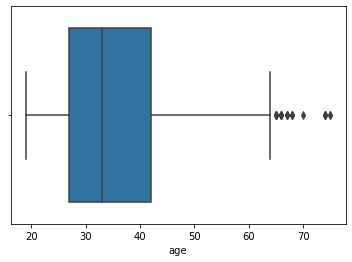

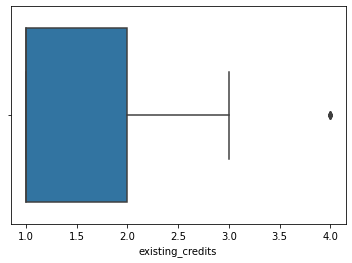

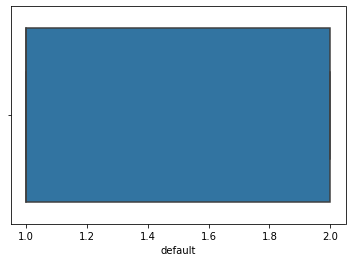

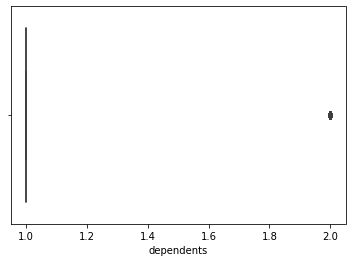

In [11]:
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()

In [ ]:
# We treat the outliers using capping method

In [12]:
for i in num_data.columns:
    q1=num_data[i].quantile(0.25)
    q3=num_data[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_data[i].quantile(0.99)
    lc=num_data[i].quantile(0.01)
    
    ind1=num_data[num_data[i]>ub].index
    ind2=num_data[num_data[i]<lb].index
    
    num_data.loc[ind1,i]=uc
    num_data.loc[ind2,i]=lc
   

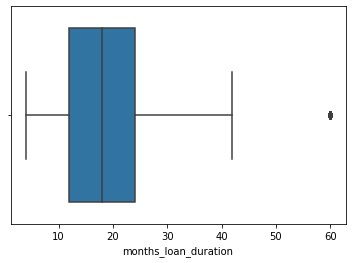

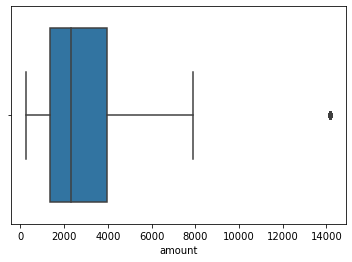

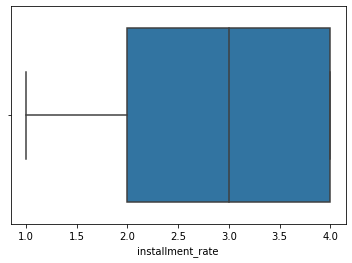

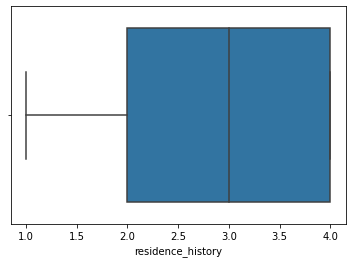

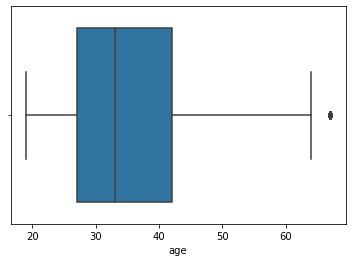

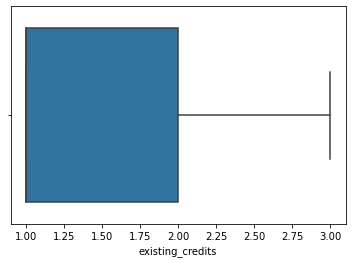

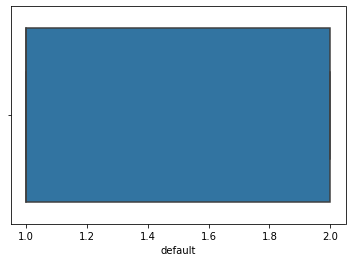

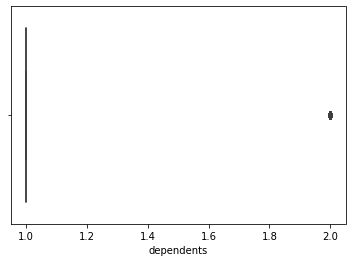

In [13]:
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()
    

# 3. Encoding Categorical variables

In [14]:

data.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,< 100 DM,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,< 0 DM,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,other,53,none,for free,2,2,2,none,yes,skilled employee


In [15]:
# Identifying the different categories under credit_history
data['credit_history'].value_counts()

repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: credit_history, dtype: int64

In [17]:
# Since credit_history has more than 1 category and also it follows a particular order we can either use ordinal encoding or replace function for simplicity.
data['credit_history']=data['credit_history'].replace({'fully repaid':4,
                                                     'fully repaid this bank':3,
                                                     'repaid':2,
                                                      'delayed':1,
                                                      'critical':0})

In [18]:
# Identifying the different categories under checking_balance
data['checking_balance'].value_counts()

< 0 DM        668
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [19]:
# Since checking_balance  has more than 1 category and also it follows a particular order we can either use ordinal encoding or replace function for simplicity.
data['checking_balance']=data['checking_balance'].replace({'< 0 DM':0,
                                                     '1 - 200 DM':1,
                                                     '> 200 DM':2})
                                                  

In [20]:
data['checking_balance'].dtype

dtype('int64')

In [21]:
# We convert the datatype to float as Logistic Models only accept float.
data['checking_balance']=data['checking_balance'].astype(float)

In [22]:
data['checking_balance'].dtype

dtype('float64')

In [23]:
# Identifying the different categories under savings_balance
data['savings_balance'].value_counts()

< 100 DM         786
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [24]:
# Since savings_balance  has more than 1 category and also it follows a particular order we can either use ordinal encoding or replace function for simplicity.
data['savings_balance']=data['savings_balance'].replace({'< 100 DM':0,
                                                     '101 - 500 DM':1,
                                                     '501 - 1000 DM':2,
                                                     '> 1000 DM':3})
                                                  

In [25]:
data['savings_balance'].dtype

dtype('int64')

In [26]:
# We convert the datatype to float as Logistic Models only accept float.
data['savings_balance']=data['savings_balance'].astype(float)

In [27]:

data['employment_length'].unique()

array(['> 7 yrs', '1 - 4 yrs', '4 - 7 yrs', 'unemployed', '0 - 1 yrs'],
      dtype=object)

In [28]:
# Since savings_balance  has more than 1 category and also it follows a particular order we can either use ordinal encoding or replace function for simplicity.
data['employment_length']=data['employment_length'].replace({'unemployed':0,
                                                     '0 - 1 yrs':1,
                                                     '1 - 4 yrs':2,
                                                    '4 - 7 yrs':3,
                                                    '> 7 yrs':4})
                                                  

In [29]:
# Purpose has multiple categories hence I prefer using frequency encoding
tab=data['purpose'].value_counts()
tab

radio/tv               280
car (new)              234
furniture              181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: purpose, dtype: int64

In [30]:
data['purpose']=data['purpose'].map(tab)

In [31]:
tab=data['job'].value_counts()
tab

skilled employee           630
unskilled resident         200
mangement self-employed    148
unemployed non-resident     22
Name: job, dtype: int64

In [32]:
# Job has few categories  but each category has a significant frequency hence I prefer using frequency encoding
data['job']=data['job'].map(tab)

In [33]:
# Identifying the different categories under other_debtors
data['other_debtors'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

In [34]:
#Since other_debtors has more than 1 category and also it follows some particular order we can either use ordinal encoding or replace function for simplicity.
data['other_debtors']=data['other_debtors'].replace({'none':0,
                                                     'guarantor':1,
                                                     'co-applicant':2})
                                                  

In [35]:
# Replacing 2 as 0 in the output column- default
data['default']=data['default'].replace({2:0})

In [36]:
data['default'].value_counts()

1    700
0    300
Name: default, dtype: int64

In [37]:
data.head(4)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,0.0,6,0,280,1169,0.0,4,4,single male,0,...,real estate,67,none,own,2,1,1,yes,yes,630
1,1.0,48,2,280,5951,0.0,2,2,female,0,...,real estate,22,none,own,1,0,1,none,yes,630
2,0.0,12,0,50,2096,0.0,3,2,single male,0,...,real estate,49,none,own,1,1,2,none,yes,200
3,0.0,42,2,181,7882,0.0,3,2,single male,1,...,building society savings,45,none,for free,1,1,2,none,yes,630


In [ ]:
# For columns with 2 to 3 categories and following no particular order we can use 1- HOT Encoding

In [38]:
data['installment_plan'].value_counts()

none      814
bank      139
stores     47
Name: installment_plan, dtype: int64

In [39]:
data['housing'].value_counts()

own         713
rent        179
for free    108
Name: housing, dtype: int64

In [40]:
data=pd.get_dummies(data,columns=['property','personal_status','installment_plan','housing','telephone','foreign_worker'],drop_first=True)

In [41]:
data.head(4)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,other_debtors,residence_history,...,property_real estate,personal_status_female,personal_status_married male,personal_status_single male,installment_plan_none,installment_plan_stores,housing_own,housing_rent,telephone_yes,foreign_worker_yes
0,0.0,6,0,280,1169,0.0,4,4,0,4,...,1,0,0,1,1,0,1,0,1,1
1,1.0,48,2,280,5951,0.0,2,2,0,2,...,1,1,0,0,1,0,1,0,0,1
2,0.0,12,0,50,2096,0.0,3,2,0,3,...,1,0,0,1,1,0,1,0,0,1
3,0.0,42,2,181,7882,0.0,3,2,1,4,...,0,0,0,1,1,0,0,0,0,1


# Building the Models  using different algorithms simultaneously so that their performance can be assessed and the best algorithm that could yield the best result with highest accuracy and minimal error could be used to get efficient results. 

In [42]:
# Defining input and output 
inp=data.drop('default',axis=1)
out=data['default']

In [43]:
# Importing required functions for the below mentioned algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
# Defining the model
logi=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier(n_neighbors=7)
gb=GradientBoostingClassifier()
ab=AdaBoostClassifier()
gnb=GaussianNB()

In [45]:
# Assesing all the models based on Bias Score, Bias Error and Variance error using f1 score.
from sklearn.model_selection import cross_val_score
for i,j in zip([logi,dt,rf,knn,gb,ab,gnb],['Logistic','DT','RF','KNN','GBoost','AB','GNB']):
    score=cross_val_score(i,inp,out,cv=5,scoring='f1')
    #print('The F1score for the 5 splits are: ',score)
    bs=np.round(score.mean(),2)
    be=np.round(1-score.mean(),2)
    ve=np.round(score.std()/score.mean(),2)
    print(j,'Bias_score:',bs,'Bias_Error:',be,
          'Variance_error:',ve)

Logistic Bias_score: 0.82 Bias_Error: 0.18 Variance_error: 0.02
DT Bias_score: 0.75 Bias_Error: 0.25 Variance_error: 0.04
RF Bias_score: 0.82 Bias_Error: 0.18 Variance_error: 0.02
KNN Bias_score: 0.78 Bias_Error: 0.22 Variance_error: 0.02
GBoost Bias_score: 0.82 Bias_Error: 0.18 Variance_error: 0.01
AB Bias_score: 0.82 Bias_Error: 0.18 Variance_error: 0.02
GNB Bias_score: 0.77 Bias_Error: 0.23 Variance_error: 0.03


In [ ]:
# Creating classification reports for all the models to analyze precision,recall and accuracy 

In [46]:
# Logistic Regression 
from sklearn.model_selection import train_test_split
logi=LogisticRegression(max_iter=500)
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,
                                          random_state=100)
logi.fit(xtrain,ytrain)
ypred=logi.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.46      0.31      0.37        81
           1       0.77      0.87      0.82       219

    accuracy                           0.72       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.69      0.72      0.70       300



In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,
                                          random_state=100)

dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.31      0.35      0.33        81
           1       0.75      0.72      0.73       219

    accuracy                           0.62       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.63      0.62      0.63       300



In [48]:
# Random Forest
rf=RandomForestClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,
                                          random_state=100)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.51      0.26      0.34        81
           1       0.77      0.91      0.83       219

    accuracy                           0.73       300
   macro avg       0.64      0.58      0.59       300
weighted avg       0.70      0.73      0.70       300



In [49]:
# KNN
knn=KNeighborsClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,
                                          random_state=100)

knn.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.51      0.26      0.34        81
           1       0.77      0.91      0.83       219

    accuracy                           0.73       300
   macro avg       0.64      0.58      0.59       300
weighted avg       0.70      0.73      0.70       300



In [50]:
# Gradient Boosting
gb=GradientBoostingClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,
                                          random_state=100)
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.49      0.32      0.39        81
           1       0.78      0.88      0.82       219

    accuracy                           0.73       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.70      0.73      0.71       300



In [51]:
# AdaBoost
ab=AdaBoostClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,
                                           random_state=100)
ab.fit(xtrain,ytrain)
ypred=ab.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.49      0.32      0.39        81
           1       0.78      0.88      0.82       219

    accuracy                           0.73       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.70      0.73      0.71       300



In [52]:
#  Gaussian NaiveBayes
gnb=GaussianNB()
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,
                                           random_state=100)
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.41      0.52      0.46        81
           1       0.80      0.73      0.76       219

    accuracy                           0.67       300
   macro avg       0.61      0.62      0.61       300
weighted avg       0.70      0.67      0.68       300



In [ ]:
# Therefore comparing the f1 scores and Bias,Bias Error, Variance Error , we can say that Random Forest Classifier and AdaBoost Classifier  are performing relatively well , hence we shortlist these two models for hypertuning.

In [54]:
# Importing required libraries for hypertuning using grid search cv
from sklearn.model_selection import GridSearchCV

In [55]:
# Defining parameters to be tuned 
parameter={'n_estimators':[20,40,60,80,100,120,140,160],
          'criterion':['gini','entropy'],
          'max_depth':[5,8,12,16,20]}

In [56]:
rf_mod=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod,param_grid=parameter,scoring='f1')


In [57]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [58]:
# Best score for tuned model
tun_mod.best_score_

0.8278937756029568

In [59]:
# Parameters to be tuned 
tun_mod.best_params_

{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 60}

In [60]:
# Fitting the tuned parameters into the final model
final_model=RandomForestClassifier(**tun_mod.best_params_)
final_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=16, n_estimators=60)

In [61]:
# Scores after hyperparamter tuning
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.51      0.30      0.37        81
           1       0.77      0.89      0.83       219

    accuracy                           0.73       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.70      0.73      0.71       300



In [62]:
# Predicting the probability of outcomes
yprob=logi.predict_proba(xtest)

In [63]:
# Finding the scores at different threshold values
for i in [0.049,0.059,0.069,0.079,0.089,0.099,0.1,0.2,0.3]:
    yprob1=yprob[:,1]
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprob1>i]=1
    print('for the threshold of:',i)
    print(classification_report(ytest,ypred_th))
    print("/////////////////////////////////////////////////////////////////")

for the threshold of: 0.049
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.73      1.00      0.84       219

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300

/////////////////////////////////////////////////////////////////
for the threshold of: 0.059
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.73      1.00      0.84       219

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300

/////////////////////////////////////////////////////////////////
for the threshold of: 0.069
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.

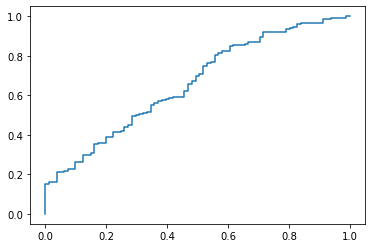

In [64]:
# Predicting the roc curve and score for the improved random forest model.
from sklearn.metrics import roc_curve,roc_auc_score
class1_prob=yprob[:,1]
fpr,tpr,th=roc_curve(ytest,class1_prob)
plt.plot(fpr,tpr)


In [65]:
roc_auc_score(ytest,class1_prob) # roc score is 0.65 which means the model is performing average.

0.6597891651164102

In [87]:
# Hypertuning AdaBoost Classifier Model
ab_mod=AdaBoostClassifier()
ab_param={'n_estimators':[10,50,100,500],
            'learning_rate':[0.0001,0.001,0.01,0.1,1.0]
         }
grid_search = GridSearchCV(estimator=ab_mod, param_grid=ab_param, n_jobs=-1,scoring='accuracy')
grid_result = grid_search.fit(xtrain, ytrain)



In [89]:
# Parameters and its corresponding values to be hypertuned are as follows:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # hence we see that the best score we can possibly get using this classifier is 0.75 when learning rate is 1.0 and number of estimators is 50

Best: 0.728571 using {'learning_rate': 1.0, 'n_estimators': 50}


In [92]:
# Finding the possible scores for this classifier at different thershold  levels to improve the model.
for i in [0.049,0.059,0.069,0.079,0.089,0.099,0.1,0.2,0.3]:
    yprob1=yprob[:,1]
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprob1>i]=1
    print('for the threshold of:',i)
    print(classification_report(ytest,ypred_th))
    print("/////////////////////////////////////////////////////////////////")

for the threshold of: 0.049
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.73      1.00      0.84       219

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300

/////////////////////////////////////////////////////////////////
for the threshold of: 0.059
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.73      1.00      0.84       219

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300

/////////////////////////////////////////////////////////////////
for the threshold of: 0.069
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.

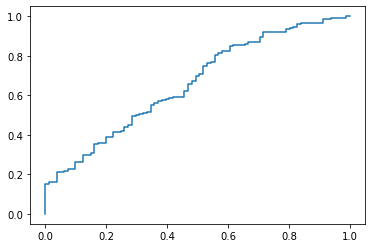

In [73]:
 # Predicting the roc curve and score for the improved Adaboost Classifier Model
from sklearn.metrics import roc_curve,roc_auc_score
class1_prob=yprob[:,1]
fpr,tpr,th=roc_curve(ytest,class1_prob)
plt.plot(fpr,tpr)


In [74]:
roc_auc_score(ytest,class1_prob) # Hence the roc score for AdaBoost is also 0.65

0.6597891651164102